# The power-law lens

The power-law lens has a convergence profile of the kind
$$
\kappa(x)=\frac{3-n}{2}x^{1-n}
$$

The corresponding mass profile is 
$$
m(x)=x^{3-n}
$$
which implies that the deflection angle is 
$$
\alpha(x)=x^{2-n}
$$
and that the shear profile is
$$
\gamma(x)=\frac{m(x)}{x^2}-\kappa(x)=\frac{n-1}{2}x^{1-n} \;.
$$

Here are some plots of some of the relevant quantities.

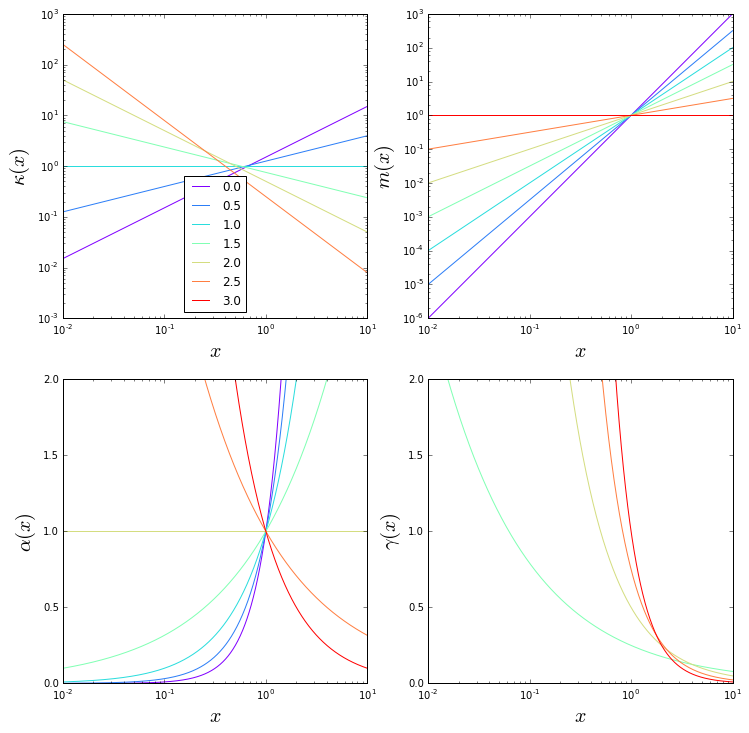

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm 
fig,ax=plt.subplots(2,2,figsize=(12,12))

x=np.logspace(-2,1.0,1000)
n=np.linspace(0,3,7)

def kappa(x,n):
    return((3-n)/2.0*np.abs(x)**(1-n))

def gamma(x,n):
    return((n-1)/2.0*np.abs(x)**(1-n))

def mass(x,n):
    return(np.abs(x)**(3-n))

def alpha(x,n):
    return(np.sign(x)*np.abs(x)**(2-n))

color=iter(cm.rainbow(np.linspace(0,1,n.size)))
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_xscale('log')
#ax[1,0].set_yscale('log')
ax[1,1].set_xscale('log')
#ax[1,1].set_yscale('log')
ax[1,0].set_ylim([0,2])
ax[1,1].set_ylim([0,2])
for i in range(n.size):
    c=next(color)
    ka=kappa(x,n[i])
    m=mass(x,n[i])
    a=alpha(x,n[i])
    g=gamma(x,n[i])
    ax[0,0].plot(x,ka,color=c,label=str(n[i]))
    ax[0,1].plot(x,m,color=c,label=str(n[i]))
    ax[1,0].plot(x,a,color=c,label=str(n[i]))
    ax[1,1].plot(x,g,color=c,label=str(n[i]))
    
ax[0,0].legend(loc='best')
ax[0,0].set_xlabel('$x$',fontsize=20)
ax[0,0].set_ylabel('$\kappa(x)$',fontsize=20)
ax[0,1].set_xlabel('$x$',fontsize=20)
ax[0,1].set_ylabel('$m(x)$',fontsize=20)
ax[1,0].set_xlabel('$x$',fontsize=20)
ax[1,0].set_ylabel(r'$\alpha(x)$',fontsize=20)
ax[1,1].set_xlabel('$x$',fontsize=20)
ax[1,1].set_ylabel(r'$\gamma(x)$',fontsize=20)




## Magnification and critical lines

The magnification is
$$
\det A=(1-\kappa-\gamma)(1-\kappa+\gamma)
$$

In particular, the inverse tangential and the radial magnifications are 
$$
\lambda_t=1-x^{1-n}
$$
and
$$
\lambda_r=1-(2-n)x^{1-n}
$$

The critical lines are given by
$$
x_t=1
$$
and 
$$
x_r=\left(\frac{1}{2-n}\right)^\frac{1}{1-n}=(2-n)^\frac{1}{n-1}
$$

(-3, 2)

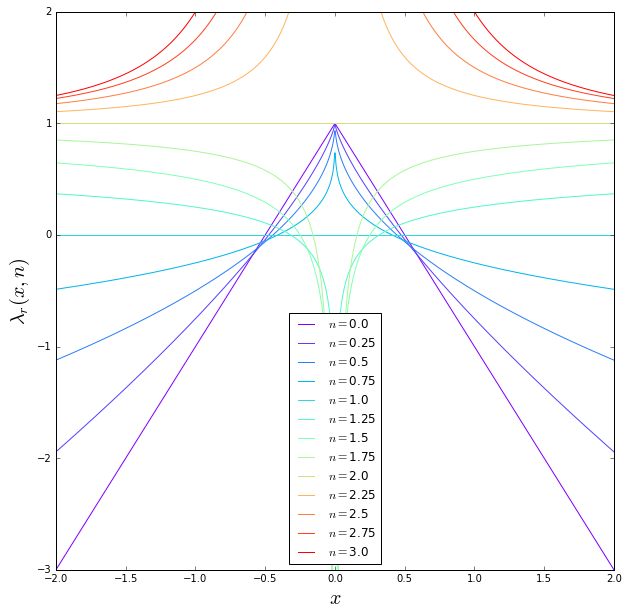

In [2]:
n=np.linspace(0.0,3.0,13)
x=np.linspace(-2.0,2.0,1000)


def lambdar_pow(x,n):
    return 1-(2.0-n)*np.abs(x)**(1.0-n)

fig,ax=plt.subplots(1,1,figsize=(10,10))
color=iter(cm.rainbow(np.linspace(0,1,n.size)))

for i in range(n.size):
    c=next(color)
    ax.plot(x,lambdar_pow(x,n[i]),color=c,label=r'$n=$'+str(n[i]))

ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$\lambda_r(x,n)$',fontsize=20)
ax.legend(loc='best')
ax.set_ylim([-3,2])

(-3, 1.1)

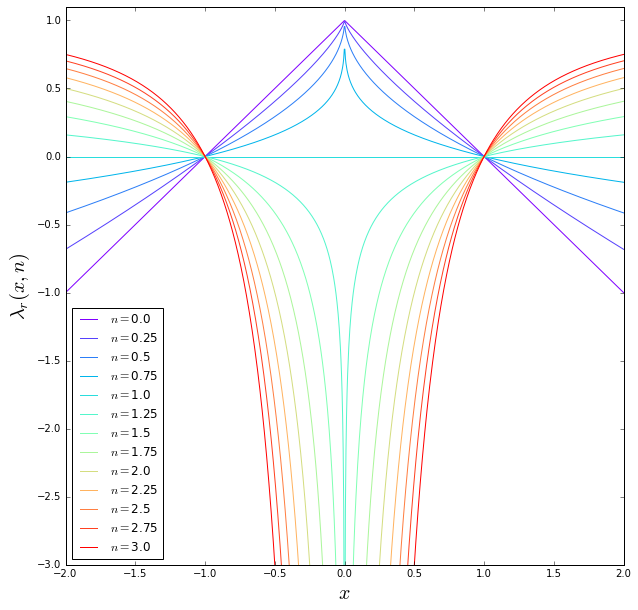

In [3]:
n=np.linspace(0.0,3.0,13)

def lambdat_pow(x,n):
    return 1-np.abs(x)**(1.0-n)

fig,ax=plt.subplots(1,1,figsize=(10,10))
color=iter(cm.rainbow(np.linspace(0,1,n.size)))

for i in range(n.size):
    c=next(color)
    ax.plot(x,lambdat_pow(x,n[i]),color=c,label=r'$n=$'+str(n[i]))

ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$\lambda_r(x,n)$',fontsize=20)
ax.legend(loc='best')
ax.set_ylim([-3,1.1])

/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in power


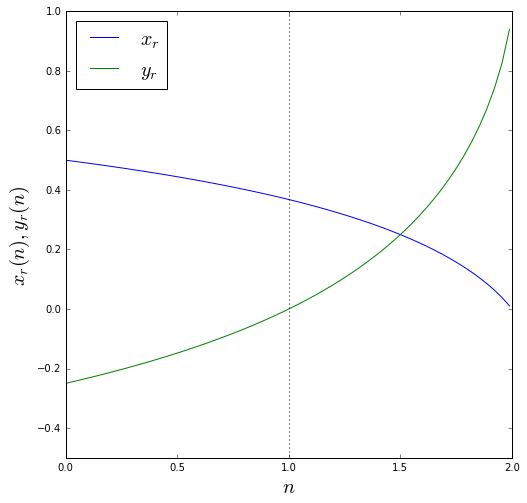

In [21]:
n=np.linspace(0.0000001,3,90)

def radcl(n):
    return((2.0-n)**(1./(n-1)))

def radcau(n):
    return -(radcl(n)-alpha(radcl(n),n))



rl=radcl(n)
rc=radcau(n)
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.plot(n,rl,label=r'$x_r$')
ax.plot(n,rc,label=r'$y_r$')

ax.set_xlabel('$n$',fontsize=20)
ax.set_ylabel('$x_r(n),y_r(n)$',fontsize=20)
ax.plot([1.0,1.0],[-1,1],':',color='black')
ax.set_ylim([-0.5,1.0])
ax.legend(loc='best',fontsize=20)

The radial critical line only exists if $n<2$. For $n>2$ there is no radial critical line.

# Multiple images

## Lenses with $n<2$

Let's discuss the occurrence of multiple images.
If $n<2$, the deflection angle is zero at the origin. In this case, as it emerges from the image diagram, multiple images can form only if $dy/dx<0$ somewhere in the lens. This translates into a condition on the derivative of the deflection angle:
$$
\frac{d\alpha}{dx}>1
$$

Being $\alpha(x)=x^{2-n}$, we have that
$$
\frac{d\alpha}{dx}=(2-n)x^{1-n} \;,
$$
which means that $d\alpha/dx>1$ for 
$$
x<(2-n)^\frac{1}{n-1}=x_r \;,
$$
in case $n>1$, and
$$
x>x_r
$$
otherwise.

Therefore, for $n<2$, there are multiple images. How many? For $y=y_r$, $d\alpha/dx=1$ meaning that that the line $x-y_r$ is tangent to $\alpha(x)$ in $x_r$. For $n>1$, $y<y_r$, there are three images of the source. Otherwise, only one. In $y=y_r$, two images merge.

/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in power


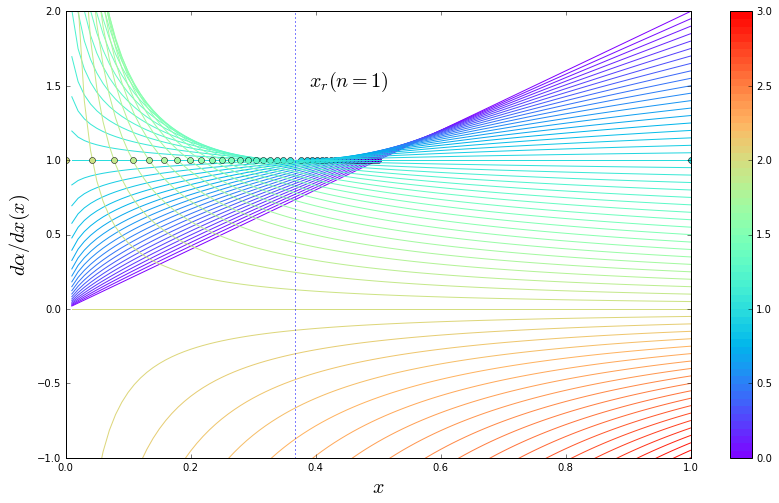

In [22]:
def dadx(x,n):
    return((2.0-n)*x**(1.0-n))

x=np.linspace(0.01,1,100)
n=np.linspace(0,3.0,61)

#xm=xmax(n)

color=iter(cm.rainbow(np.linspace(0,1,n.size)))

Z = [[0,0],[0,0]]
levels = n#range(min,max+step,step)
CS3 = plt.contourf(Z, levels, cmap=cm.rainbow)
plt.clf()

fig,ax=plt.subplots(1,1,figsize=(14,8))
ax.set_ylim([-1,2])



#ax.plot(n,xm,'-')
xr=radcl(n)
yr=np.zeros(n.size)+1.0
for i in range(n.size):
    c=next(color)
    dd=dadx(x,n[i])
    ax.plot(x,dd,'-',color=c)
    ax.plot(xr[i],yr[i],'o',markeredgecolor='black',markersize=6,c=c)
    
xr=radcl(1.001)
xx=[xr,xr]
yy=[-1.0,2.0]
#ax.plot(x,dd,'--',color='black')
ax.plot(xx,yy,':')

cb=plt.colorbar(CS3)
cb.set_ticks([0.0,0.5,1.0,1.5,2.0,2.5,3.0])

ax.set_xlabel('$x$',fontsize=20)
ax.set_ylabel(r'$d\alpha/dx(x)$',fontsize=20)

ax.text(0.39,1.5,'$x_r(n=1)$',fontsize=20)


The following are some image diagrams for lenses with $n=0.1,1.0,1.5$

/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/scipy/optimize/minpack.py:236: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/scipy/optimize/minpack.py:236: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


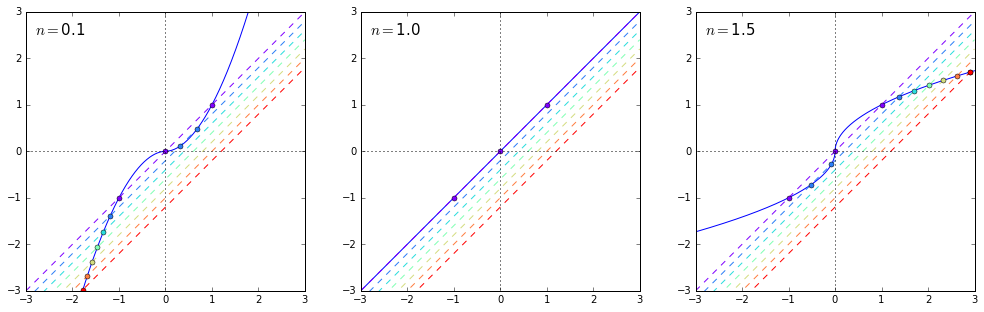

In [6]:
import math
from scipy.optimize import *

n=[0.1,1.0,1.5]

fig,ax=plt.subplots(1,3,figsize=(17,5))

x=np.linspace(-3,3,1000)

def f(x,y):
    return(x-y)
    
ys=np.linspace(0,1.2,7)


    
for i in range(len(n)):
    a=alpha(x,n[i])
    ax[i].plot(x,a,'-')
    color=iter(cm.rainbow(np.linspace(0,1,len(ys))))
    for j in range(len(ys)):
        c=next(color)
        fu=f(x,ys[j])
        ax[i].plot(x,fu,'--',c=c)
        def func(xx):
            return f(xx,ys[j])-alpha(xx,n[i])
        x0 = fsolve(func,1.0)
        x1 = fsolve(func,-1.0)
        x3 = fsolve(func,0.0)
        if (np.abs(func(x0))<1e-8):
            ax[i].plot(x0,alpha(x0,n[i]),'o',markersize=5,c=c)
        if (np.abs(func(x1))<1e-8):
            ax[i].plot(x1,alpha(x1,n[i]),'o',markersize=5,c=c)
        if (np.abs(func(x3))<1e-8):
            ax[i].plot(x3,alpha(x3,n[i]),'o',markersize=5,c=c)
        
        
    ax[i].set_xlim([-3,3])
    ax[i].set_ylim([-3,3])
    ax[i].text(-2.8,2.5,'$n=$'+str(n[i]),fontsize=15)

    
    xa=[0.0,0.0]
    ya=[-10,10]
    ax[i].plot(xa,ya,':',color='black')
    
    xa=[-10.0,10.0]
    ya=[0,0]
    ax[i].plot(xa,ya,':',color='black')
    



Some noticeable properties:
* these lenses produce three or one image
* three images are formed if the source lays inside the radial critical line, i.e. for $y<y_r$, where $y_r$ corresponds to $x_r: dy/dx=0$

# Lenses with $n>2$

These lenses always produce multiple images because of the singuarity of their lensing potential.

The following are some examples of image diagrams for $n=2.0,2.1,3.0$.

/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in power
/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in multiply
/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in reciprocal


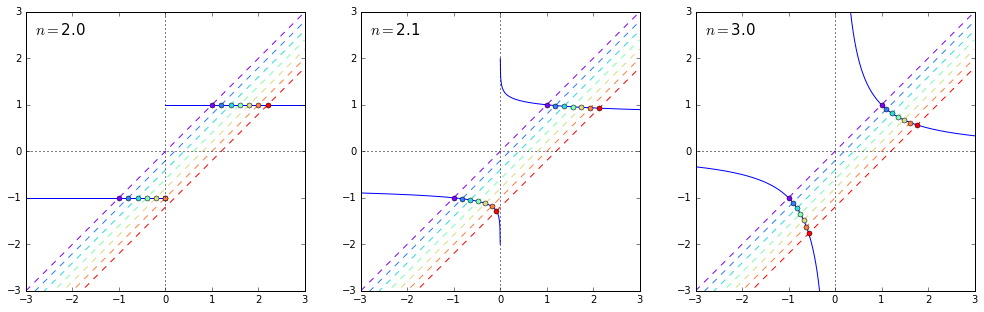

In [7]:
n=[2.0,2.1,3.0]

fig,ax=plt.subplots(1,3,figsize=(17,5))

x0=np.linspace(-3,-1.e-3,500)
x1=np.linspace(1.e-3,3,500)
    
ys=np.linspace(0,1.2,7)
    
for i in range(len(n)):
    a0=alpha(x0,n[i])
    a1=alpha(x1,n[i])
    ax[i].plot(x0,a0,'-',color='blue')
    ax[i].plot(x1,a1,'-',color='blue')
    color=iter(cm.rainbow(np.linspace(0,1,len(ys))))
    for j in range(len(ys)):
        c=next(color)
        fu=f(x,ys[j])
        ax[i].plot(x,fu,'--',c=c)
        def func(xx):
            return f(xx,ys[j])-alpha(xx,n[i])
        x0_ = fsolve(func,1.0)
        x1_ = fsolve(func,-1.0)
        x3_ = fsolve(func,0.0)
        if (np.abs(func(x0_))<1e-8):
            ax[i].plot(x0_,alpha(x0_,n[i]),'o',markersize=5,c=c)
        if (np.abs(func(x1_))<1e-8):
            ax[i].plot(x1_,alpha(x1_,n[i]),'o',markersize=5,c=c)
        if (np.abs(func(x3_))<1e-8 and j>0):
            ax[i].plot(x3_,alpha(x3_,n[i]),'o',markersize=5,c=c)
            
    ax[i].set_xlim([-3,3])
    ax[i].set_ylim([-3,3])
    ax[i].text(-2.8,2.5,'$n=$'+str(n[i]),fontsize=15)

    xa=[0.0,0.0]
    ya=[-10,10]
    ax[i].plot(xa,ya,':',color='black')
    
    xa=[-10.0,10.0]
    ya=[0,0]
    ax[i].plot(xa,ya,':',color='black')



Notice  that
* none of these lenses ever has a central image
* while for a lens with $n=2$ produces multiple images only for $|y|<y_{cut}=1$, all lenses with $n>2$ always have 2 images
* the $x_{-}$ image always moves towards the center of the lens as $y\rightarrow \infty$

# Image separation vs $n$

We explore now the sensitivity of image separation on the power-law index $n$.

/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in power
/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in multiply


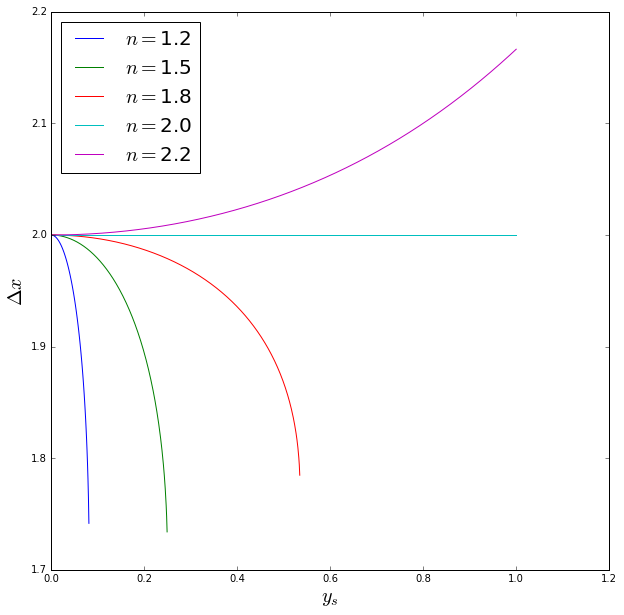

In [33]:
n=[1.2,1.5,1.8,2.0,2.2]

x0=np.linspace(-3,-1.e-3,500)
x1=np.linspace(1.e-3,3,500)
    
ys=np.linspace(0,1,1000)

fig,ax=plt.subplots(1,1,figsize=(10,10))
    
for i in range(len(n)):
    a0=alpha(x0,n[i])
    a1=alpha(x1,n[i])
    s0=np.zeros(ys.size)
    s1=np.zeros(ys.size)
    s2=np.zeros(ys.size)
    dtheta=[]
    ytheta=[]
    te=[]
    for j in range(len(ys)):
        def func(xx):
            return f(xx,ys[j])-alpha(xx,n[i])
        x0_ = fsolve(func,1.0)
        x1_ = fsolve(func,-1.0)
        x2_ = fsolve(func,0.0)
        if (np.abs(func(x0_))<1e-8):
            s0[j]=x0_[0]
        if (np.abs(func(x1_))<1e-8 and x1_<0):
            s1[j]=x1_[0]
            dtheta.append(np.abs(s1[j]-s0[j]))
            ytheta.append(ys[j])
        if (np.abs(func(x2_))<1e-8):
            s2[j]=x2_[0]
    
    ax.set_xlim([0,1.2])
    ax.plot(ytheta,dtheta,'-',label='$n=$'+str(n[i]))
    ax.legend(loc='best',fontsize=20)
    ax.set_xlabel('$y_s$',fontsize=20)
    ax.set_ylabel('$\Delta x$',fontsize=20)
    ax.set_ylim([1.7,2.2])
    




# Time delays

The formula for the light travel time is 
$$
t(x)=\frac{(1+z_L)}{c}\frac{D_{L}D_S}{D_{LS}}\frac{\xi_0^2}{D_L^2}\left[\frac{1}{2}(x-y)^2-\psi(x)\right]=\frac{(1+z_L)}{c}\frac{D_{L}D_S}{D_{LS}}\tau(x)
$$

For a power-law lens, the lensing potential is
$$
\psi(x)=\frac{1}{3-n}x^{3-n}
$$
so that
$$
\tau(x)=\frac{\xi_0^2}{D_L^2}\left[\frac{1}{2}(x-y)^2-\frac{1}{3-n}x^{3-n}\right]
$$

At the image positions
$$
x-y=\alpha(x)=x^{2-n}
$$
thus
$$
\tau(x_i)=\frac{\xi_0^2}{D_L^2}\left[\frac{1}{2}x_i^{2(2-n)}-\frac{1}{3-n}x_i^{3-n}\right]
$$

We can then compute the time delay between the images:
$$
\Delta t_{ij} \propto \Delta \tau_{ij}=\frac{\xi_0^2}{D_L^2}\left[\frac{1}{2}\left(x_j^{2(2-n)}-x_i^{2(2-n)}\right)-\frac{1}{3-n}\left(x_j^{3-n}-x_i^{3-n}\right)\right]
$$
For $n=2$, this formula gives:
$$
\Delta \tau_{ij}=\frac{\xi_0^2}{D_L^2}(x_i-x_j)=\theta_E^2\left(\frac{\theta_i}{\theta_E}-\frac{\theta_j}{\theta_E}\right)=\frac{1}{2}\left(\theta_i^2-\theta_j^2\right)=\Delta\tau_{SIS}
$$



/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in subtract


(-0.05, 1.5)

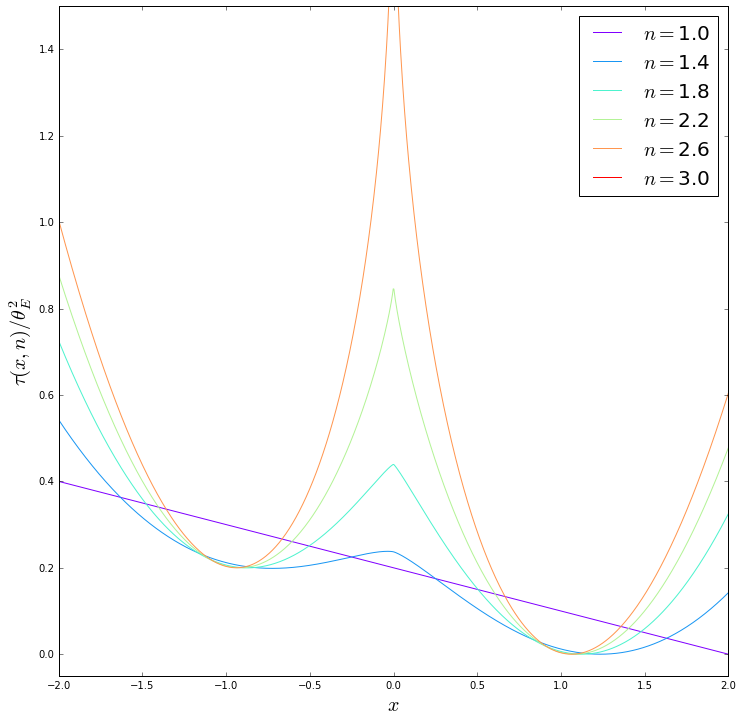

In [46]:
def pot_power(x,n):
    return 1.0/(3.0-n)*np.abs(x)**(3.0-n)

def travel_time_power(y,x,n):
    return (0.5*(x-y)**2-pot_power(x,n))

x=np.linspace(-2.0,2.0)
n=np.linspace(1.0,3.0,6)

color=iter(cm.rainbow(np.linspace(0,1,n.size)))

x=np.linspace(-2.0,2.0,1000)

fig,ax=plt.subplots(1,1,figsize=(12,12))

y=0.1
for i in range(n.size):
    c=next(color)
    ax.plot(x,travel_time_power(y,x,n[i])-np.amin(travel_time_power(y,x,n[i])),color=c,label=r'$n=$'+str(n[i]))
    #ax.plot(x,pot_power(x,n[i]),color=c)
ax.set_xlabel('$x$',fontsize=20)
ax.set_ylabel(r'$\tau(x,n)/\theta_E^2$',fontsize=20)
ax.legend(loc='best',fontsize=20)
ax.set_ylim([-0.05,1.5])

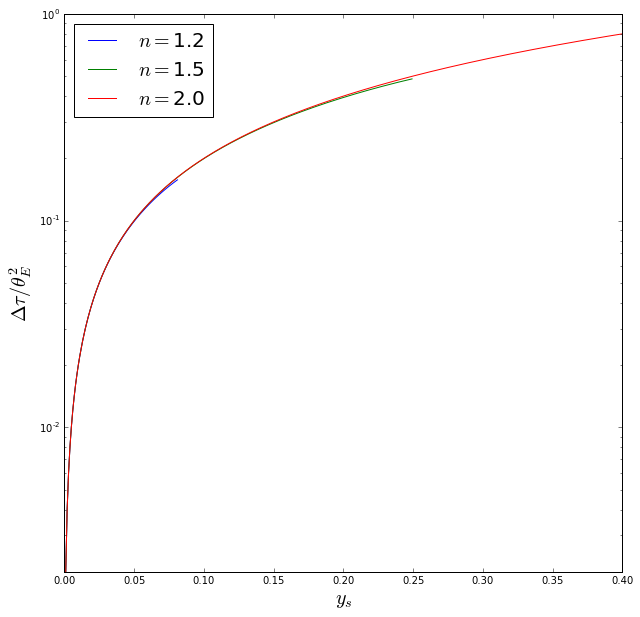

In [9]:
n=[1.2,1.5,2.0]

x0=np.linspace(-3,-1.e-3,500)
x1=np.linspace(1.e-3,3,500)
    
ys=np.linspace(0,1,1000)

fig,ax=plt.subplots(1,1,figsize=(10,10))

def time_delay(x1,x2,n):
    return(0.5*(x2**(2*(2-n))-x1**(2*(2-n)))-1.0/(3.0-n)*(x2**(3-n)-x1**(3-n)))

    
for i in range(len(n)):
    a0=alpha(x0,n[i])
    a1=alpha(x1,n[i])
    s0=np.zeros(ys.size)
    s1=np.zeros(ys.size)
    ytheta=[]
    td=[]
    dtheta=[]
    for j in range(len(ys)):
        def func(xx):
            return f(xx,ys[j])-alpha(xx,n[i])
        x0_ = fsolve(func,1.0)
        x1_ = fsolve(func,-1.0)
        if (np.abs(func(x0_))<1e-8):
            s0[j]=x0_[0]
        if (np.abs(func(x1_))<1e-8 and x1_<0):
            s1[j]=x1_[0]
            dtheta.append(s1[j]+s0[j])
            ytheta.append(ys[j])
            t=time_delay(s0[j],-s1[j],n[i])
            td.append(t)
    
    ax.set_xlim([0,0.4])
    ax.set_ylim([0,1.0])
    ax.set_yscale('log')
    ax.plot(ytheta,td,'-',label='$n=$'+str(n[i]))
    ax.legend(loc='best',fontsize=20)
    ax.set_xlabel('$y_s$',fontsize=20)
    ax.set_ylabel(r'$\Delta \tau/\theta_E^2$',fontsize=20)

In the case of small image separations with respect to the size of the Einstein radius (i.e. $y<<1$), Kochanek (2002) derived an approximated formula stating that
$$
\Delta t(n)=(n-1)\Delta t_{SIS}\left[1-\frac{(2-n)^2}{12}\left(\frac{\delta\theta}{\langle\theta\rangle}\right)^2+...\right]
$$
The formula however works also in the case of $\delta\theta/\langle\theta\rangle$ of order unity.

Let us assume to observe an image separation of $\delta\theta=1"$ and $\langle\theta\rangle=5"$. In this case $\Delta t(n)/\Delta t_{SIS}$ looks like this:

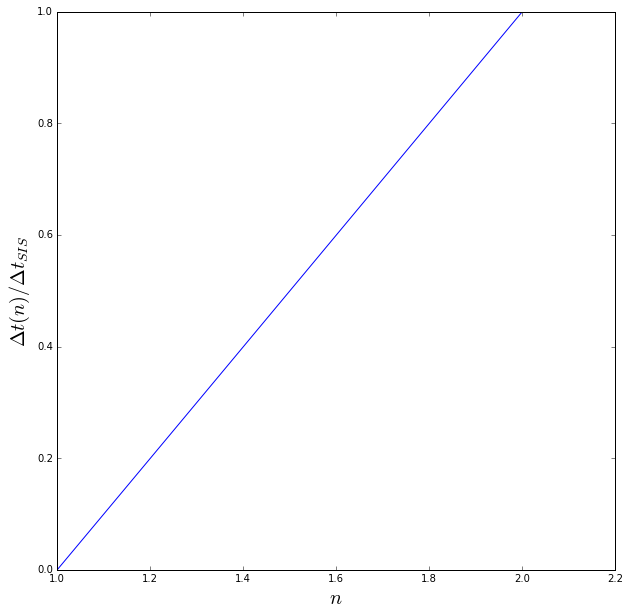

In [10]:
def deltat(dtheta,thetam,n):
    return (n-1)*(1-(2-n)**2/12*dtheta**2/thetam**2)

n=np.linspace(1.0,2.0,100)
dt=deltat(1.0,5.0,n)

fig,ax=plt.subplots(1,1,figsize=(10,10))

ax.plot(n,dt,'-')
ax.set_xlabel('$n$',fontsize=20)
ax.set_ylabel(r'$\Delta t(n)/\Delta t_{SIS}$',fontsize=20)

This shows that more centrally concentrated lenses (larger $n$) produce larger time delays for a fixed image separation.